
#Assignment No 4b
######*Sibt ul Hussain*
----
##Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

##TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

##Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

##Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

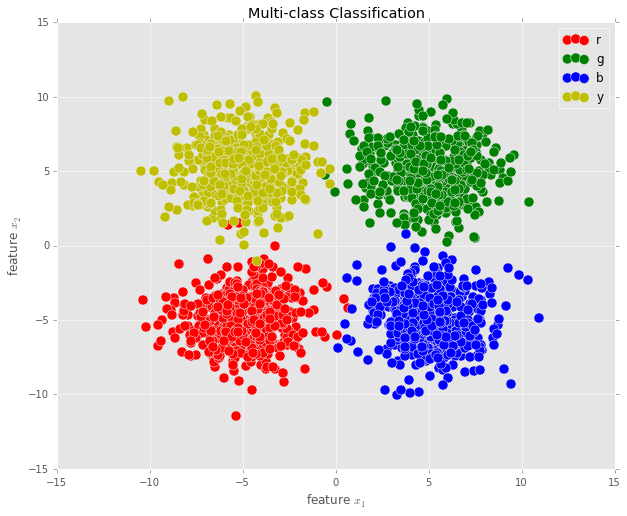

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))


In [6]:
import randomForest as rf

In [7]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')

In [8]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [9]:
#%debug
rfc.train(X,Y)

Creating Left Child Node With 999 Examples, and Right Node with 1001 Examples
Creating Left Child Node With 982 Examples, and Right Node with 17 Examples
Creating Left Child Node With 488 Examples, and Right Node with 494 Examples
Creating Left Child Node With 118 Examples, and Right Node with 370 Examples
Creating Child Node With ClassLabel=1.0, nexamples=118, classes=[(1.0, 118)]
Creating Child Node With ClassLabel=1.0, nexamples=370, classes=[(1.0, 369), (4.0, 1)]
Creating Left Child Node With 86 Examples, and Right Node with 408 Examples
Creating Child Node With ClassLabel=4.0, nexamples=86, classes=[(1.0, 3), (4.0, 83)]
Creating Child Node With ClassLabel=4.0, nexamples=408, classes=[(4.0, 408)]
Creating Left Child Node With 8 Examples, and Right Node with 9 Examples
Creating Left Child Node With 4 Examples, and Right Node with 4 Examples
Creating Child Node With ClassLabel=1.0, nexamples=4, classes=[(1.0, 3), (4.0, 1)]
Creating Child Node With ClassLabel=1.0, nexamples=4, classes

In [10]:
len(rfc.trees)

10

In [11]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,493,0,4,3,500
2.0,0,500,0,0,500
3.0,0,1,499,0,500
4.0,1,2,0,497,500
All,494,503,503,500,2000


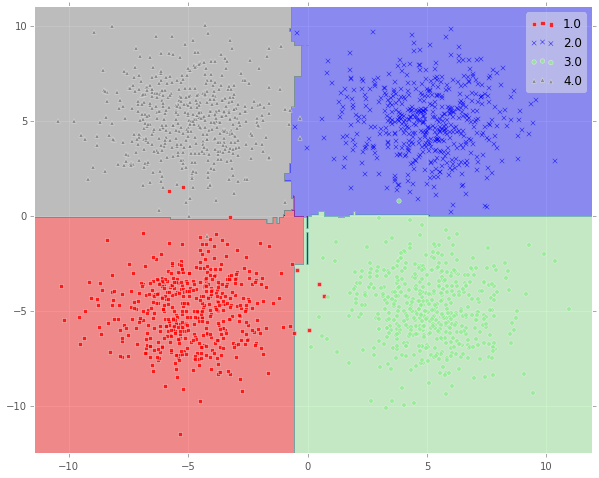

In [12]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [13]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,248,0,1,1,250
2.0,0,250,0,0,250
3.0,0,1,249,0,250
4.0,1,2,0,247,250
All,249,253,250,248,1000


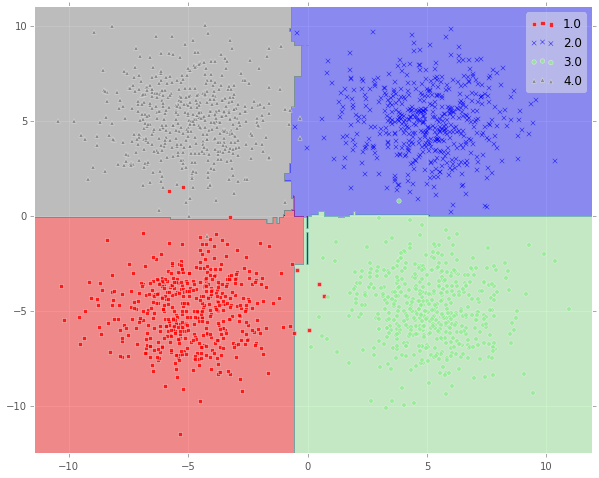

In [14]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


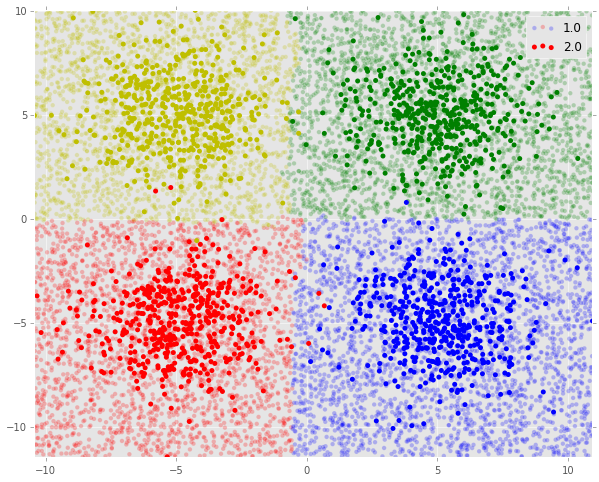

In [18]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

###Lets Plot Per-Tree Decision Boundary

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


<function matplotlib.pyplot.tight_layout>

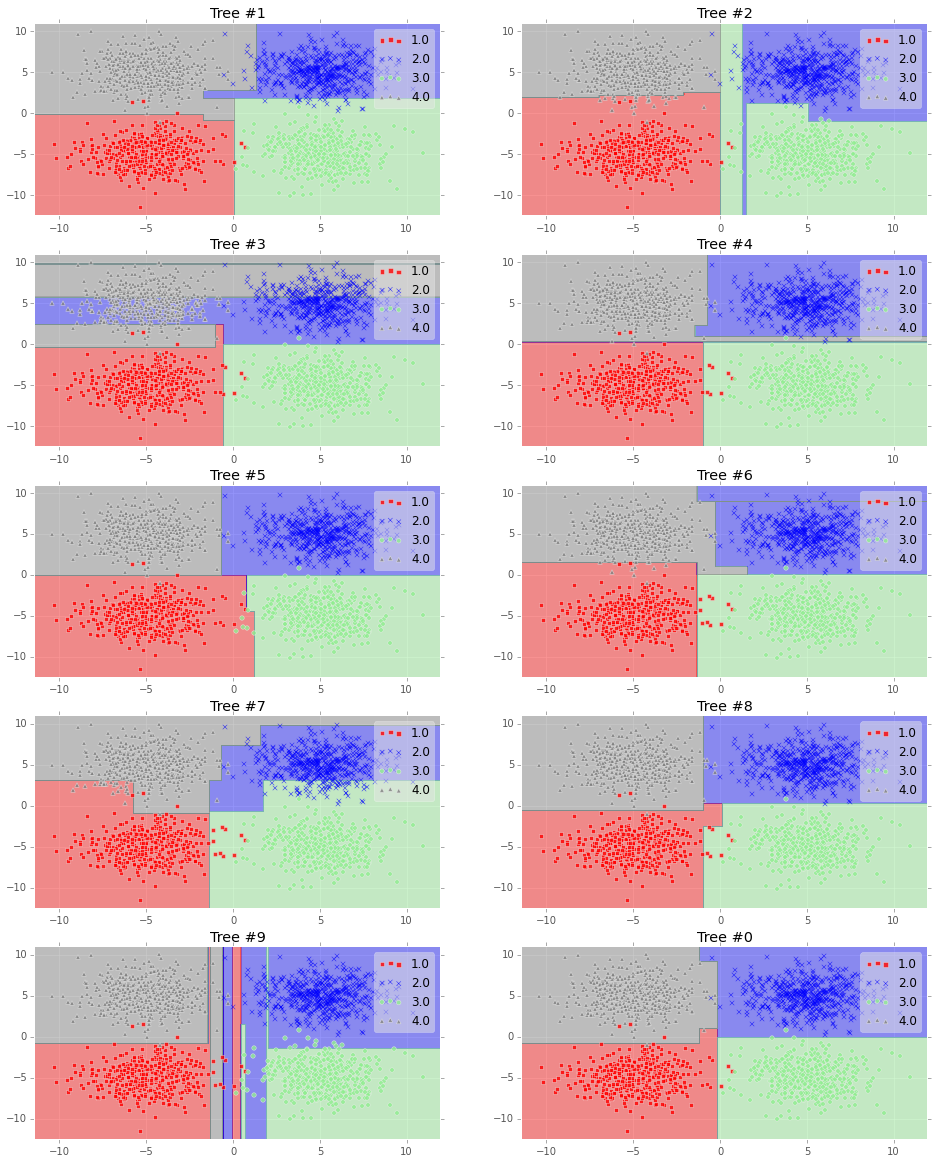

In [19]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

####What Can You conclude

##Lets Run on Nonlinear Data, The Spherical Examples...

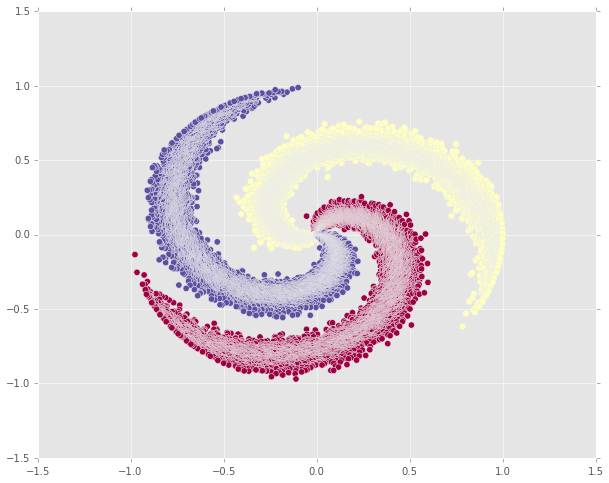

In [20]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

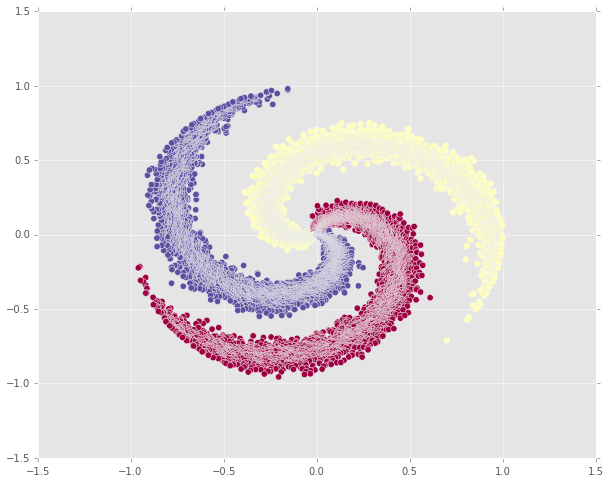

In [21]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [22]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)

Creating Left Child Node With 5677 Examples, and Right Node with 24323 Examples
Creating Left Child Node With 3737 Examples, and Right Node with 1940 Examples
Creating Left Child Node With 296 Examples, and Right Node with 3441 Examples
Creating Left Child Node With 10 Examples, and Right Node with 286 Examples
Creating Child Node With ClassLabel=0, nexamples=10, classes=[(0, 10)]
Creating Child Node With ClassLabel=0, nexamples=286, classes=[(0, 286)]
Creating Left Child Node With 252 Examples, and Right Node with 3189 Examples
Creating Child Node With ClassLabel=2, nexamples=252, classes=[(0, 71), (2, 181)]
Creating Child Node With ClassLabel=2, nexamples=3189, classes=[(0, 154), (2, 3035)]
Creating Left Child Node With 1124 Examples, and Right Node with 816 Examples
Creating Left Child Node With 313 Examples, and Right Node with 811 Examples
Creating Child Node With ClassLabel=0, nexamples=313, classes=[(0, 313)]
Creating Child Node With ClassLabel=2, nexamples=811, classes=[(2, 811

In [23]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,9870,67,63,10000
1,326,9658,16,10000
2,74,1257,8669,10000
All,10270,10982,8748,30000


In [24]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,4949,25,26,5000
1,132,4864,4,5000
2,28,615,4357,5000
All,5109,5504,4387,15000


(10000, 2)
[0.0, 1.0, 2.0]


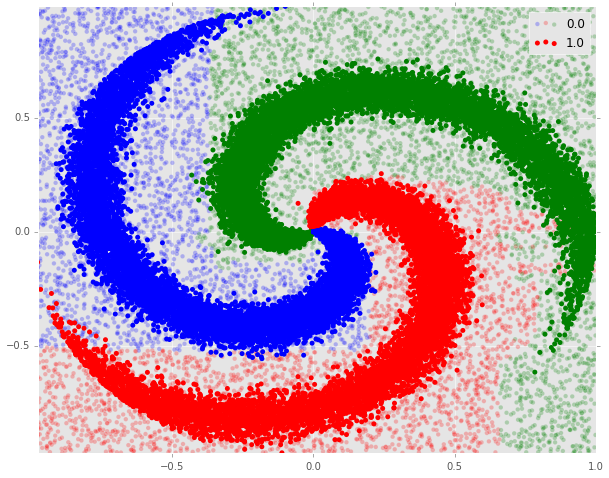

In [26]:
t.plot_points_range(rfc,X,Y)

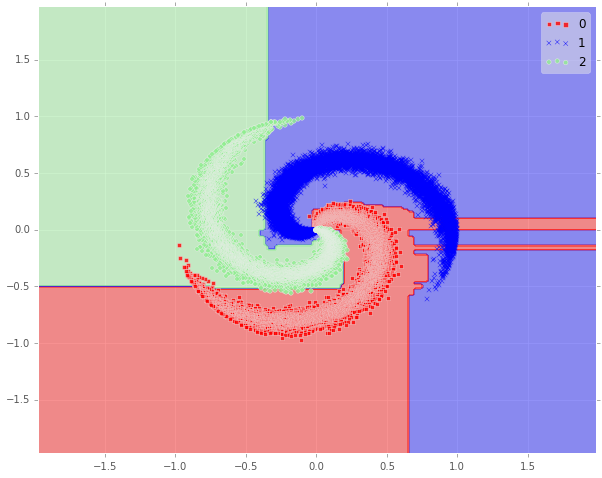

In [27]:
t.plot_decision_regions(X,Y,rfc)

###Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

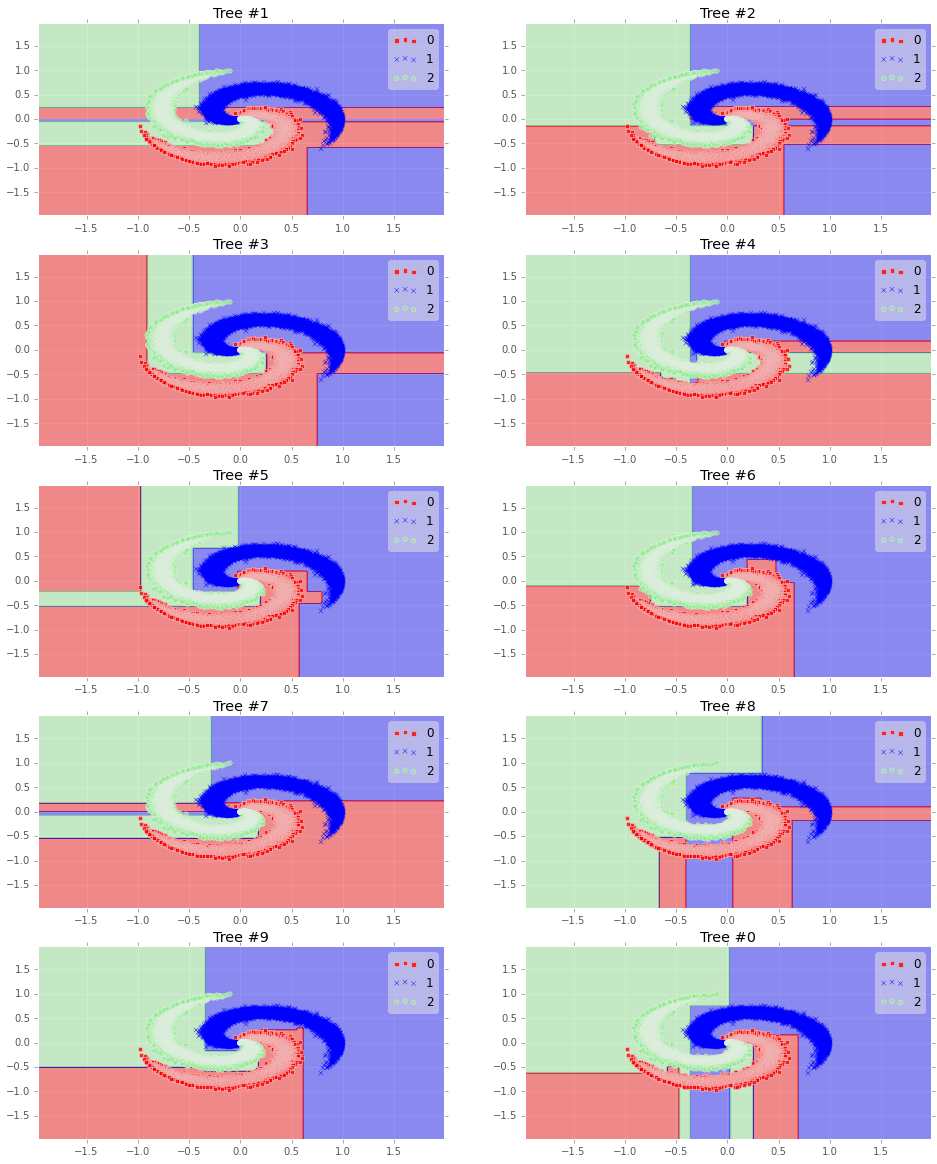

In [28]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

##TODO: Find Optimal Number of Trees for this data set, using cross validation...